In [1]:
#imports
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

#Classification
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier


In [2]:
#data
rawData = pd.read_csv('creditNew.csv', header=0)
rawData.head()

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,1,1,0,0,0,0,1
1,120000,2,26,-1,2,0,0,0,2,2682,...,1000,0,2000,1,1,0,0,0,0,1
2,90000,2,34,0,0,0,0,0,0,29239,...,1000,1000,5000,0,1,0,0,0,0,1
3,50000,1,37,0,0,0,0,0,0,46990,...,1100,1069,1000,0,1,0,0,0,0,1
4,50000,1,57,-1,0,-1,0,0,0,8617,...,9000,689,679,0,0,1,0,0,0,1


In [3]:
#These will be the variables for when limit balance is the dependant variable
#The L at the end of the names means we are refering to Limit Balance

#dependent variable
YdataL = rawData["LIMIT_BAL"]

#independent variable
XdataL = rawData.drop(["LIMIT_BAL"], axis = 1)


X_trainL, X_testL, Y_trainL, Y_testL = train_test_split(XdataL, YdataL, test_size = .30, random_state = 123)

In [4]:
#Selecting our Model
model = LinearRegression(n_jobs=10)

In [5]:
#Find how good tthis model is for predicting 
print(cross_val_score(model, XdataL, YdataL, cv=5)) 

[0.39439776 0.33770001 0.40073498 0.44624716 0.32934238]


In [6]:
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [7]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, XdataL,YdataL, cv=5, scoring='r2')
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.7721057176409462
Linear Regression 0.38168445897951886
Support Vector Regression -0.04039480526893739


In [8]:
#Based on the above results, it seems Random Forest seems to be the best algo, so we will use that to build a model

algo = RandomForestRegressor()

modelRF = algo.fit(X_trainL, Y_trainL)

In [9]:
predictions = modelRF.predict(X_testL)
rmse = sqrt(mean_squared_error(Y_testL, predictions))

predRsquared = r2_score(Y_testL,predictions)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.614
RMSE: 79127.641


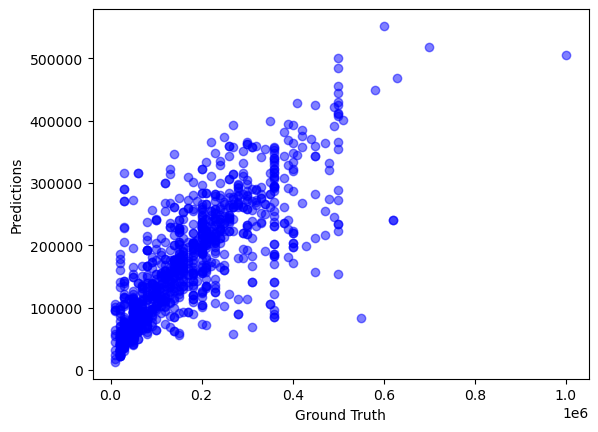

In [10]:
plt.scatter(Y_testL, predictions, color=['blue'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

In [11]:
limitBalBucket = []

for i in range(102):
    if i == 0:
        limitBalBucket.append(0)
    else:
        limitBalBucket.append(((i)*10000)-1)

#print(len(limitBalBucket))
print(limitBalBucket)

YdataL2 = pd.cut(rawData["LIMIT_BAL"], limitBalBucket, labels = False)





[0, 9999, 19999, 29999, 39999, 49999, 59999, 69999, 79999, 89999, 99999, 109999, 119999, 129999, 139999, 149999, 159999, 169999, 179999, 189999, 199999, 209999, 219999, 229999, 239999, 249999, 259999, 269999, 279999, 289999, 299999, 309999, 319999, 329999, 339999, 349999, 359999, 369999, 379999, 389999, 399999, 409999, 419999, 429999, 439999, 449999, 459999, 469999, 479999, 489999, 499999, 509999, 519999, 529999, 539999, 549999, 559999, 569999, 579999, 589999, 599999, 609999, 619999, 629999, 639999, 649999, 659999, 669999, 679999, 689999, 699999, 709999, 719999, 729999, 739999, 749999, 759999, 769999, 779999, 789999, 799999, 809999, 819999, 829999, 839999, 849999, 859999, 869999, 879999, 889999, 899999, 909999, 919999, 929999, 939999, 949999, 959999, 969999, 979999, 989999, 999999, 1009999]


In [12]:

print(YdataL2)




0        2
1       12
2        9
3        5
4        5
        ..
3663    22
3664     7
3665    12
3666    18
3667     5
Name: LIMIT_BAL, Length: 3668, dtype: int64


In [13]:
print(rawData["LIMIT_BAL"])

0        20000
1       120000
2        90000
3        50000
4        50000
         ...  
3663    220000
3664     70000
3665    120000
3666    180000
3667     50000
Name: LIMIT_BAL, Length: 3668, dtype: int64


In [14]:
X_trainL2, X_testL2, Y_trainL2, Y_testL2 = train_test_split(XdataL, YdataL2, test_size = .30, random_state = 123)

#X_trainL, X_testL, Y_trainL, Y_testL = train_test_split(XdataL, YdataL2, test_size = .30, random_state = 123)

algoDTC = DecisionTreeClassifier()
modelDTC = algoDTC.fit(X_trainL2,Y_trainL2)

predDTC = modelDTC.predict(X_testL2)

print(classification_report(Y_testL2, predDTC))


              precision    recall  f1-score   support

           1       0.59      0.77      0.67        13
           2       0.72      0.66      0.69        65
           3       0.57      0.56      0.56        63
           4       0.45      0.45      0.45        11
           5       0.65      0.76      0.70       115
           6       0.78      0.58      0.67        31
           7       0.61      0.50      0.55        34
           8       0.51      0.53      0.52        49
           9       0.50      0.64      0.56        25
          10       0.53      0.55      0.54        31
          11       0.50      0.70      0.58        23
          12       0.55      0.50      0.52        32
          13       0.41      0.58      0.48        24
          14       0.68      0.51      0.58        37
          15       0.46      0.46      0.46        41
          16       0.52      0.56      0.54        27
          17       0.45      0.56      0.50        16
          18       0.46    

c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [15]:
modelDTC = DecisionTreeClassifier()
print(cross_val_score(modelDTC, XdataL, YdataL2, cv=5))

c:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0.99455041 0.76294278 0.11989101 0.75989086 0.99317872]


In [21]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))


#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, XdataL,YdataL2, cv=5, scoring='accuracy')
    names.append(name)
    results.append(result)


print("This is Classification Test Result for Limit Balance as the dependant variable )")
for i in range(len(names)):
    print(names[i],results[i].mean())

c:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


This is Classification Test Result for Limit Balance as the dependant variable )
Random Forest Classifier 0.753619368724699
Decision Tree Classifier 0.7282720780934608


c:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [17]:
YdataD = rawData["default"]
XdataD = rawData.drop(["default"], axis = 1)


X_trainD, X_testD, Y_trainD, Y_testD = train_test_split(XdataD, YdataD, test_size = .30, random_state = 123)

algoDTC = DecisionTreeClassifier()
modelDTC = algoDTC.fit(X_trainD,Y_trainD)

predDTC = modelDTC.predict(X_testD)

print(classification_report(Y_testD, predDTC))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       874
           1       0.63      0.70      0.66       227

    accuracy                           0.85      1101
   macro avg       0.77      0.80      0.78      1101
weighted avg       0.86      0.85      0.86      1101



In [18]:
modelDTC = DecisionTreeClassifier()
print(cross_val_score(modelDTC, XdataD, YdataD, cv=5))

[1.         0.92779292 0.72479564 0.91950887 1.        ]


In [22]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))


#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, XdataD,YdataD, cv=5, scoring='accuracy')
    names.append(name)
    results.append(result)


print("This is for when Default or not is the dependant variable )")
for i in range(len(names)):
    print(names[i],results[i].mean())


This is for when Default or not is the dependant variable )
Random Forest Classifier 0.938404749248172
Decision Tree Classifier 0.9116950607967704
